In [259]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [260]:
path = 'offline_5_data.csv'
data = np.genfromtxt(path, delimiter=',')
k_value = 6

In [261]:
def k_means_clustering(dataset, k):
    n = data.shape[0]
    cluster_centers = data[np.random.choice(n, k, replace=False)]
    
    clusters = [[] for _ in range(cluster_centers.shape[0])]
    temp_clusters = [[] for _ in range(cluster_centers.shape[0])]
    
    iteration = 0
    
    while True:
        temp_clusters = [[] for _ in range(cluster_centers.shape[0])]
        # Determine distance between "S" and "C".
        distance = np.zeros((n, k))
        for i in range(k):
            distance[:, i] = ((data-cluster_centers[i])**2).sum(axis=1) ** 0.5
        
        # Assign samples to the closest center
        closest_center_indices = np.argmin(distance, axis=1)
        for sample_idx, center_idx in enumerate(closest_center_indices):
            temp_clusters[center_idx].append(sample_idx)
            
        # Calculate new centers
        for i in range(k):
            cluster_centers[i] = data[closest_center_indices == i].mean(axis=0)
        
        iteration+=1
        
        if iteration > 1:
            shifts = np.zeros(data.shape[0], dtype=bool)
            
            for idx, sample in enumerate(data):
                old_cluster = np.where([idx in cluster_samples for cluster_samples in clusters])[0]
                new_cluster = np.where([idx in cluster_samples for cluster_samples in temp_clusters])[0]

                if old_cluster != new_cluster:
                    shifts[idx] = True
            
            shift_count = np.sum(shifts)
            
            if shift_count < 10:
                clusters = temp_clusters.copy()
                break
        
        clusters = temp_clusters.copy()
    
    plt.scatter(data[:,0],data[:,1],c=closest_center_indices)
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='*')
    plt.show()

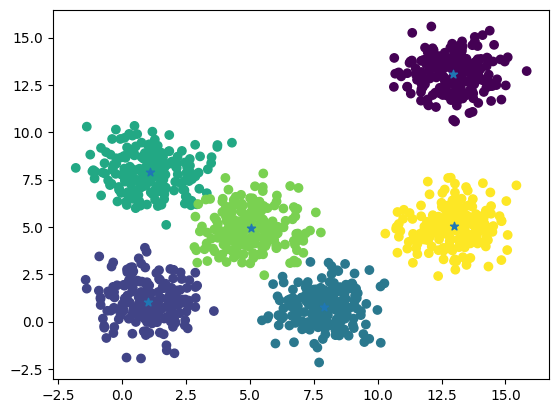

In [262]:
k_means_clustering(data, k_value)

In [263]:
# cluster_centers = data[np.random.choice(n, k, replace=False)]

In [264]:
# print(cluster_centers)

In [265]:
# data[0]

In [266]:
# cluster_centers[0]

In [267]:
# Initialize 2 2D lists named "Clusters" and "Temp_Clusters"
# clusters = [[] for _ in range(cluster_centers.shape[0])]
# temp_clusters = [[] for _ in range(cluster_centers.shape[0])]


# temp_clusters = list()

In [268]:
# temp_clusters = [[] for _ in range(k)]
# for i, sample in enumerate(data):
#     min_distance_idx = np.argmin(np.linalg.norm(sample - cluster_centers, axis=1))
#     temp_clusters[min_distance_idx].append(i)

In [269]:
# temp_clusters

In [270]:
# # Determine distance between "S" and "C".
# distance = np.zeros((n, k))
# for i in range(k):
#     distance[:, i] = ((data-cluster_centers[i])**2).sum(axis=1) ** 0.5

In [271]:
# distance.shape

In [272]:
# closest_center_indices = np.argmin(distance, axis=1)
# for sample_idx, center_idx in enumerate(closest_center_indices):
#     temp_clusters[center_idx].append(sample_idx)

In [273]:
# closest_center_indices

In [274]:
# len(temp_clusters)

In [275]:
# temp_clusters = np.argmin(distance, axis=1)

In [276]:
# len(temp_clusters)

In [277]:
# Alternative way:

# for cluster_idx, cluster_samples in enumerate(temp_clusters):
#     if len(cluster_samples) > 0:
#         cluster_centers[cluster_idx] = np.mean(data[cluster_samples], axis=0)

In [278]:
# for i in range(k):
#     cluster_centers[i] = data[closest_center_indices == i].mean(axis=0)

In [279]:
# cluster_centers